In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [7]:
data = pd.read_csv("vectorized_fw2.csv", index_col=0)
test = pd.read_csv("test_ds.csv", index_col=0)

In [8]:
wc_t = data["total wc"][0]

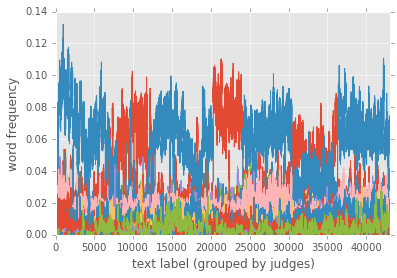

In [9]:
(data.iloc[:,3:]/wc_t).plot(legend = False)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")

In [10]:
train_x = np.array(data.iloc[:,3:])
train_x = np.nan_to_num(train_x)
train_x = train_x/wc_t
train_y = np.array(data.iloc[:,0])

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=2, criterion = "entropy")

In [13]:
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
wc = np.array(test["total wc"])
temp = np.array(test.iloc[:,3:])
temp = np.nan_to_num(temp)
test_x = []
for i in range(wc.shape[0]):
    vec = temp[i]/wc[i]
    test_x.append(vec)
test_x = np.array(test_x)

In [90]:
predict = pd.Series(clf.predict(test_x), index=test.file_n)

In [91]:
predict.to_csv("predict.csv", encoding="utf8")

In [92]:
predict_proba = pd.DataFrame(clf.predict_proba(test_x), index=test.file_n.as_matrix(), columns=clf.classes_)

In [93]:
predict_proba.to_csv("predict_proba.csv", encoding="utf8")

In [18]:
feature_importances = pd.Series(clf.feature_importances_, index=data.columns[3:])

In [ ]:
feature_importances.sort_values(ascending=False, inplace=True)

In [19]:
feature_importances.to_csv("feature_importances.csv")